In [104]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib.legend_handler import HandlerLine2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, log_loss, hinge_loss, roc_curve, auc, classification_report

In [105]:
train = pd.read_csv('D:\StudyMaterial Part 2\Know_I\Titanic\\train.csv', engine='python')
test = pd.read_csv('D:\StudyMaterial Part 2\Know_I\Titanic\\test.csv', engine='python') 
gender = pd.read_csv('D:\StudyMaterial Part 2\Know_I\Titanic\\gender_submission.csv', engine='python')

In [106]:
#train = pd.concat([train, test], ignore_index = True, sort=False)
train.head()

#SibSp: Number of Siblings or Spouse
#Parch: Number of Parents or Children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [108]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [109]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [110]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [111]:
gender.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [112]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [113]:
train.isnull().any().sum()

3

In [114]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
train.isnull().sum().sum()

866

In [116]:
test.isnull().sum().sum()

414

In [117]:
train['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [118]:
train['Fare'].isnull().any().sum()

0

In [119]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [120]:
print("mean: ", train['Age'].mean())
print("std: ", train['Age'].std())
print("median: ", train['Age'].median())
print("mode: ", train['Age'].mode())

mean:  29.69911764705882
std:  14.526497332334042
median:  28.0
mode:  0    24.0
dtype: float64


In [121]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [122]:
train['Age'].isnull().sum()

177

C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages

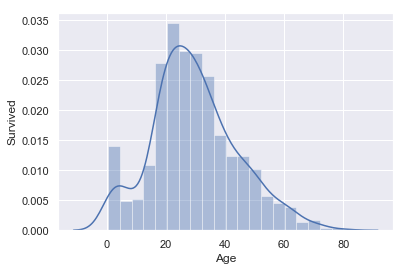

In [123]:
sns.distplot(train['Age'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

False 



C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages

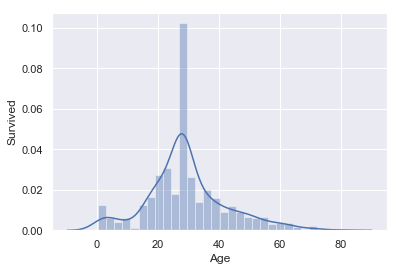

In [682]:
train['Age'].fillna(train['Age'].median(), inplace=True)
print(train['Age'].isnull().any(), "\n")
sns.distplot(train['Age'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

False 



C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages

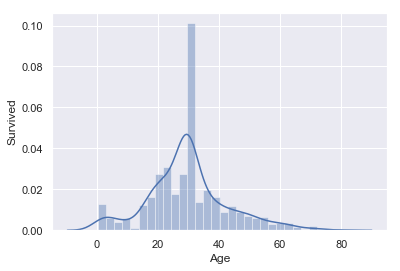

In [124]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
print(train['Age'].isnull().any(), "\n")
sns.distplot(train['Age'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

False 



C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages

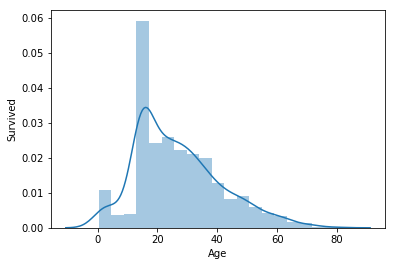

In [391]:
train['Age'].fillna(train['Age'].std(), inplace=True)
print(train['Age'].isnull().any(), "\n")
sns.distplot(train['Age'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [209]:
#skew: measure of asymmetry in data distribution
#skew is important to create better linear models
#for mean and median, the skew is negative. But for std, the skew is positive.
#yet, we choose mean/median since the their bell curves are more closer to 0 skew than std's

In [125]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [126]:
test['Age'].isnull().any()

True

In [127]:
test['Age'].isnull().sum()

86

In [128]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Age'].head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [129]:
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [130]:
train['Cabin'].fillna('U0', inplace=True)
train['Cabin'].unique()

array(['U0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64'

In [131]:
train['Deck'] = train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train['Deck'].unique() #cabin: heatmap

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [132]:
train['Deck'].head()

0    U
1    C
2    U
3    C
4    U
Name: Deck, dtype: object

In [133]:
train['Deck'].describe()
#since max number of available values is NAN, Cabin is removed. else, it could contribute to bias.

count     891
unique      9
top         U
freq      687
Name: Deck, dtype: object

In [134]:
train['Deck'].head()

0    U
1    C
2    U
3    C
4    U
Name: Deck, dtype: object

In [135]:
test['Cabin'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [136]:
test['Cabin'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Cabin, dtype: object

In [138]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [139]:
test['Cabin'].fillna('U0', inplace=True)
test['Cabin'].unique()

array(['U0', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [140]:
test['Deck'] = test['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
test['Deck'].unique() #cabin: heatmap

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [141]:
test['Deck'].describe()

count     418
unique      8
top         U
freq      327
Name: Deck, dtype: object

In [142]:
test['Deck'].head()

0    U
1    U
2    U
3    U
4    U
Name: Deck, dtype: object

In [143]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [144]:
train['Embarked'].isnull().any().sum()

1

In [145]:
train['Embarked'].fillna("S", inplace=True) 
test['Embarked'].fillna("S", inplace=True)
#since it is just 1 value, the probabilty of being the most frequent value is high. 
#Hence, illing na with S (the most frequest item)

In [146]:
train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [147]:
#encode Embarked
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [148]:
train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [149]:
test['Embarked'].head()

0    Q
1    S
2    Q
3    S
4    S
Name: Embarked, dtype: object

In [150]:
train['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [151]:
test['Sex'].head()

0      male
1    female
2      male
3      male
4    female
Name: Sex, dtype: object

In [152]:
train['SibSp'].head()  #sibling-spouse

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [153]:
train['Parch'].head() #parent-child

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

In [154]:
train['Family'] = train.loc[:,'SibSp']+train.loc[:,'Parch']
test['Family'] = test.loc[:,'SibSp']+test.loc[:,'Parch']

In [155]:
train['Family'].head() 

0    1
1    1
2    0
3    1
4    0
Name: Family, dtype: int64

In [156]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [157]:
def name_title(str):
    result = re.findall('[A-Za-z]+\.', str) #result is a list
    if result:
        return result[0] #iff result is present, returns value at index 0
    else:
        return None

train['Name_Title'] = train['Name'].apply(name_title)
test['Name_Title'] = test['Name'].apply(name_title)
#apply is a pandas function that applies the function for the entire dataframe column

In [158]:
train['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [159]:
test['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Dona.'], dtype=object)

In [160]:
train['Name_Title'].isnull().any()

False

In [161]:
train['Name_Title'] = train['Name_Title'].replace('Miss.', 'Ms.')
train['Name_Title'] = train['Name_Title'].replace('Mlle.', 'Ms.')
train['Name_Title'] = train['Name_Title'].replace('Mme.', 'Mrs.')
test['Name_Title'] = test['Name_Title'].replace('Miss.', 'Ms.')
test['Name_Title'] = test['Name_Title'].replace('Mlle.', 'Ms.')
test['Name_Title'] = test['Name_Title'].replace('Mme.', 'Mrs.')

In [162]:
train['Name_Title'].describe()

count     891
unique     14
top       Mr.
freq      517
Name: Name_Title, dtype: object

In [163]:
train['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Ms.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Major.',
       'Lady.', 'Sir.', 'Col.', 'Capt.', 'Countess.', 'Jonkheer.'],
      dtype=object)

In [164]:
test['Name_Title'].unique()

array(['Mr.', 'Mrs.', 'Ms.', 'Master.', 'Col.', 'Rev.', 'Dr.', 'Dona.'],
      dtype=object)

In [165]:
train.drop(['Cabin', 'Name', 'PassengerId', 'SibSp', 'Parch'], inplace=True, axis=1) 
test.drop(['Cabin', 'Name', 'PassengerId', 'SibSp', 'Parch'], inplace=True, axis=1) 

In [166]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
Deck          0
Family        0
Name_Title    0
dtype: int64

In [167]:
train['Deck'].fillna("U", inplace=True)

In [168]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
Deck          0
Family        0
Name_Title    0
dtype: int64

In [169]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Deck,Family,Name_Title
0,0,3,male,22.0,A/5 21171,7.2500,S,U,1,Mr.
1,1,1,female,38.0,PC 17599,71.2833,C,C,1,Mrs.
2,1,3,female,26.0,STON/O2. 3101282,7.9250,S,U,0,Ms.
3,1,1,female,35.0,113803,53.1000,S,C,1,Mrs.
4,0,3,male,35.0,373450,8.0500,S,U,0,Mr.


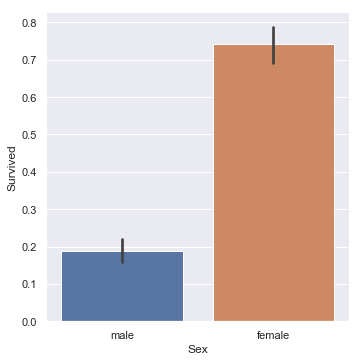

In [170]:
sns.set(color_codes=True)
sns.catplot(x='Sex', y='Survived', kind='bar', data=train)

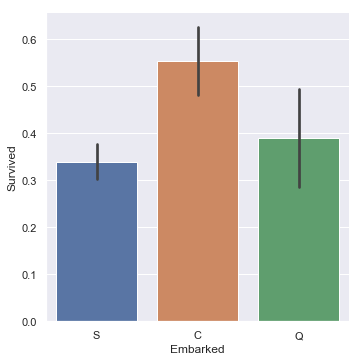

In [171]:
sns.catplot(x='Embarked',y='Survived',kind='bar', data=train)

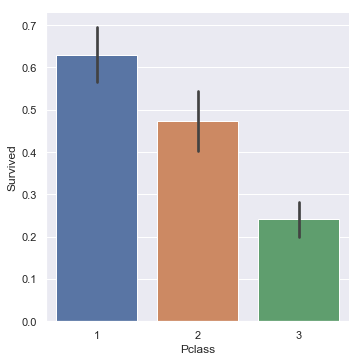

In [172]:
sns.catplot(x='Pclass',y='Survived', kind='bar', data=train)

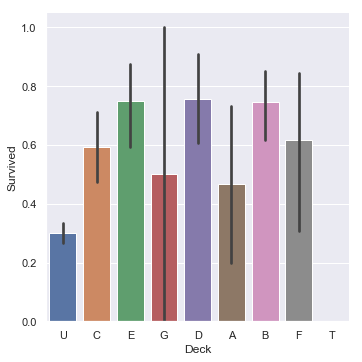

In [173]:
sns.catplot(x='Deck',y='Survived', kind='bar', data=train)

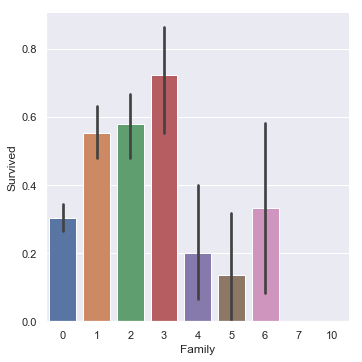

In [174]:
sns.catplot(x='Family',y='Survived', kind='bar', data=train)

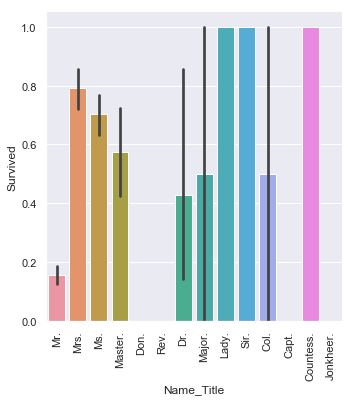

In [175]:
graph = sns.catplot(x='Name_Title',y='Survived', kind='bar', data=train)
graph.set_xticklabels(rotation=90)

In [176]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8, "T": 0}
train['Deck'] = train['Deck'].map(deck)
test['Deck'] = test['Deck'].map(deck)

In [177]:
def encode_attr(attr):
    enc = LabelEncoder()
    train_attr = np.array(train[attr]).reshape(-1,1)
    test_attr = np.array(test[attr]).reshape(-1,1)
    train[attr] = enc.fit_transform(train_attr)
    test[attr] = enc.fit_transform(test_attr)

In [178]:
encode_attr('Sex')
encode_attr('Embarked')
encode_attr('Name_Title')

C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [179]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
Deck          0
Family        0
Name_Title    0
dtype: int64

In [180]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Deck,Family,Name_Title
0,0,3,1,22.0,A/5 21171,7.2500,2,8,1,9
1,1,1,0,38.0,PC 17599,71.2833,0,3,1,10
2,1,3,0,26.0,STON/O2. 3101282,7.9250,2,8,0,11
3,1,1,0,35.0,113803,53.1000,2,3,1,10
4,0,3,1,35.0,373450,8.0500,2,8,0,9


In [181]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,Deck,Family,Name_Title
0,3,1,34.5,330911,7.8292,1,8,0,4
1,3,0,47.0,363272,7.0000,2,8,1,5
2,2,1,62.0,240276,9.6875,1,8,0,4
3,3,1,27.0,315154,8.6625,2,8,0,4
4,3,0,22.0,3101298,12.2875,2,8,2,5


In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    float64
 4   Ticket      891 non-null    object 
 5   Fare        891 non-null    float64
 6   Embarked    891 non-null    int32  
 7   Deck        891 non-null    int64  
 8   Family      891 non-null    int64  
 9   Name_Title  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4), object(1)
memory usage: 59.3+ KB


In [183]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Deck,Family,Name_Title
0,0,3,1,22.0,A/5 21171,7.2500,2,8,1,9
1,1,1,0,38.0,PC 17599,71.2833,0,3,1,10
2,1,3,0,26.0,STON/O2. 3101282,7.9250,2,8,0,11
3,1,1,0,35.0,113803,53.1000,2,3,1,10
4,0,3,1,35.0,373450,8.0500,2,8,0,9


In [184]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,Deck,Family,Name_Title
0,3,1,34.5,330911,7.8292,1,8,0,4
1,3,0,47.0,363272,7.0000,2,8,1,5
2,2,1,62.0,240276,9.6875,1,8,0,4
3,3,1,27.0,315154,8.6625,2,8,0,4
4,3,0,22.0,3101298,12.2875,2,8,2,5


In [185]:
test.isnull().any()

Pclass        False
Sex           False
Age           False
Ticket        False
Fare           True
Embarked      False
Deck          False
Family        False
Name_Title    False
dtype: bool

In [186]:
test.isnull().sum().sum()

1

In [187]:
test['Fare'].isnull().any().sum()

1

In [188]:
test['Fare'].fillna(0, inplace=True)

In [189]:
test['Fare'].isnull().any().sum()

0

In [190]:
tr_col = list(train.columns.values)
ind = tr_col.index('Survived')
tr_col.pop(ind)
train = train[tr_col+['Survived']]
print(train.columns)

Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'Deck', 'Family',
       'Name_Title', 'Survived'],
      dtype='object')


In [191]:
train.drop(['Ticket'], inplace=True, axis=1) 
test.drop(['Ticket'], inplace=True, axis=1) 
#inplace says if dataframe is true
# axis takes int or string value for rows/columns. Input can be 0 or 1 for Integer and ‘index’ or ‘columns’ for String

C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [192]:
train.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family,Name_Title,Survived
0,3,1,22.0,7.2500,2,8,1,9,0
1,1,0,38.0,71.2833,0,3,1,10,1
2,3,0,26.0,7.9250,2,8,0,11,1
3,1,0,35.0,53.1000,2,3,1,10,1
4,3,1,35.0,8.0500,2,8,0,9,0


In [193]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Deck,Family,Name_Title
0,3,1,34.5,7.8292,1,8,0,4
1,3,0,47.0,7.0000,2,8,1,5
2,2,1,62.0,9.6875,1,8,0,4
3,3,1,27.0,8.6625,2,8,0,4
4,3,0,22.0,12.2875,2,8,2,5


In [194]:
test.isnull().sum().sum()

0

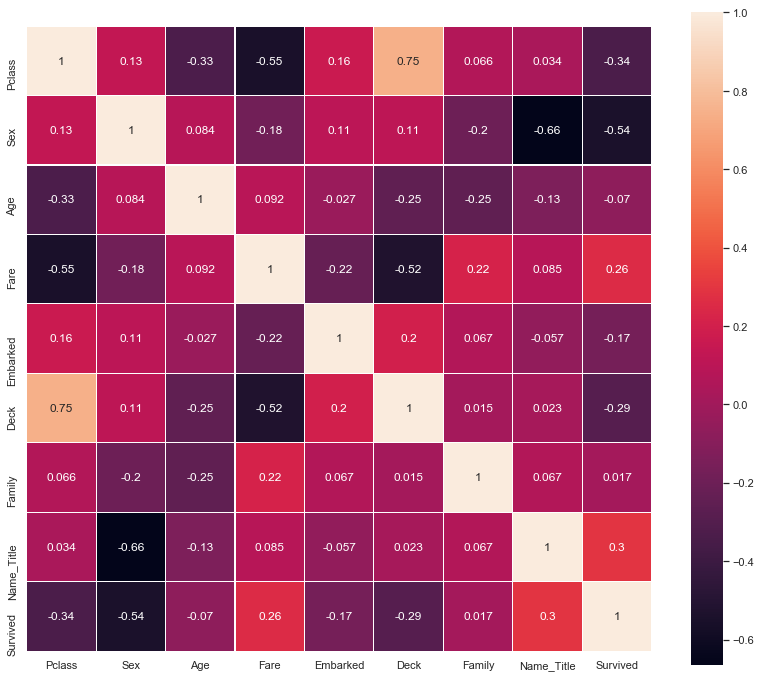

In [195]:
plt.figure(figsize=(14,12))
sns.heatmap(train.astype(float).corr(),linewidths=0.1, square=True,  linecolor='white', annot=True)
plt.show()

In [196]:
train.shape

(891, 9)

In [197]:
train.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Deck          0
Family        0
Name_Title    0
Survived      0
dtype: int64

In [198]:
print(train.columns)
print(test.columns)
#To verify if the order of selected columns in both train and test are the same

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family',
       'Name_Title', 'Survived'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Family',
       'Name_Title'],
      dtype='object')


In [199]:
X_train, y_train = train.values[:,:-1], train.values[:,-1]

#values returns values of the dataframe as a numpy aray

In [200]:
X_train.shape

(891, 8)

In [201]:
y_train.shape

(891,)

In [202]:
X_test, y_test = test.values[:,:], gender.values[:,-1]

In [203]:
X_test.shape

(418, 8)

In [204]:
y_test.shape

(418,)

In [205]:
print(np.any(np.isnan(X_train)), np.all(np.isfinite(X_train)))

False True


In [206]:
random = RandomForestClassifier(random_state=1)
random.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [207]:
random.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [208]:
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}

In [209]:
GridSearchCV(cv=5, error_score='raise', estimator=random, n_jobs=1,
             param_grid=param_grid, pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             return_train_score='warn')

In [210]:
#On each iteration, the algorithm will choose a difference combination of the features.
#Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings!
#However, the benefit of a random search is that we are not trying every combination,
#but selecting at random to sample a wide range of values.

In [211]:
random.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [212]:
random.score(X_test, y_test)

0.7703349282296651

In [213]:
y_pred = random.predict(X_test)
y_pred

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [214]:
errors = abs(y_pred - y_test)
errors

array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [215]:
log_loss(y_test, y_pred) 

7.932459595609921

In [217]:
cf_matrix = confusion_matrix(y_test, y_pred)  
cf_matrix

array([[209,  57],
       [ 39, 113]], dtype=int64)

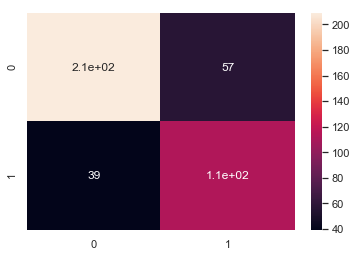

In [218]:
sns.heatmap(cf_matrix, annot=True)

In [219]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       266
           1       0.66      0.74      0.70       152

    accuracy                           0.77       418
   macro avg       0.75      0.76      0.76       418
weighted avg       0.78      0.77      0.77       418



In [220]:
random_fpr, random_tpr, random_threshold = roc_curve(y_test, y_pred)
random_roc_auc = auc(random_fpr, random_tpr)
random_roc_auc

0.7645676691729323

In [221]:
filename = 'finalized_random.pkl'
pickle.dump(random, open(filename, 'wb'))
random_loaded = pickle.load(open(filename, 'rb'))
result = random_loaded.score(X_test, y_test)
print(result)

0.7703349282296651


In [222]:
random_grid= GridSearchCV(estimator=random, param_grid=param_grid, cv= 5)
random_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [223]:
random_grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 200}

In [224]:
random_grid.score(X_test, y_test)

0.8038277511961722

In [225]:
y_pred = random_grid.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [226]:
errors = abs(y_pred - y_test)
errors

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [227]:
log_loss(y_test, y_pred) 

6.775625952822688

In [229]:
cf_matrix = confusion_matrix(y_test, y_pred)  
cf_matrix

array([[226,  40],
       [ 42, 110]], dtype=int64)

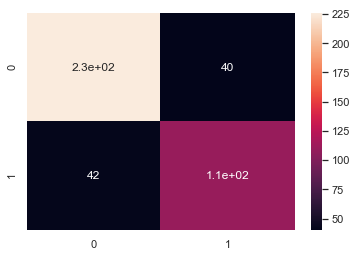

In [230]:
sns.heatmap(cf_matrix, annot=True)

In [231]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       266
           1       0.73      0.72      0.73       152

    accuracy                           0.80       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.80      0.80      0.80       418



In [232]:
grid_fpr, grid_tpr, grid_threshold = roc_curve(y_test, y_pred)
grid_roc_auc = auc(grid_fpr, grid_tpr)
grid_roc_auc

0.7866541353383459

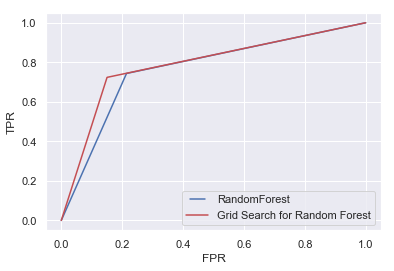

In [233]:
#to compare auc scores of random forest and RandomGrid
line1 = plt.plot(random_fpr, random_tpr, 'b', label='RandomForest')
line2 = plt.plot(grid_fpr, grid_tpr, 'r', label='Grid Search for Random Forest')
plt.legend(handler_map= {line1[0]: HandlerLine2D(numpoints=2)})
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [234]:
filename = 'finalized_random_grid.pkl'
pickle.dump(random_grid, open(filename, 'wb'))
random_grid_loaded = pickle.load(open(filename, 'rb'))
result = random_grid_loaded.score(X_test, y_test)
print(result)

0.8038277511961722


In [235]:
logistic = LogisticRegression(random_state=1)
logistic.fit(X_train, y_train)

C:\Users\rps24\anaconda3\envs\Titanic\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

In [236]:
logistic.score(X_test, y_test)

0.9354066985645934

In [237]:
y_pred = logistic.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [238]:
# calculate error: |predicted values - actual values| 
errors = abs(y_pred - y_test)
errors

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [239]:
log_loss(y_test, y_pred) 

2.2309774207116004

In [241]:
cf_matrix = confusion_matrix(y_test, y_pred)  
cf_matrix

array([[264,   2],
       [ 25, 127]], dtype=int64)

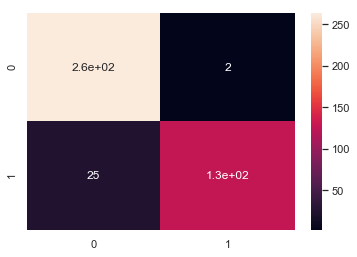

In [242]:
sns.heatmap(cf_matrix, annot=True)

In [243]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       266
           1       0.98      0.84      0.90       152

    accuracy                           0.94       418
   macro avg       0.95      0.91      0.93       418
weighted avg       0.94      0.94      0.93       418



In [244]:
logistic_fpr, logistic_tpr, logistic_threshold = roc_curve(y_test, y_pred)
logistic_roc_auc = auc(logistic_fpr, logistic_tpr)
logistic_roc_auc

0.9140037593984962

In [245]:
filename = 'finalized_logistic.pkl'
pickle.dump(logistic, open(filename, 'wb'))
logistic_loaded = pickle.load(open(filename, 'rb'))
result = logistic_loaded.score(X_test, y_test)
print(result)

0.9354066985645934


In [246]:
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [247]:
param_grid = [{'penalty' : ['l1', 'l2'], 'C' : np.logspace(-0.001, 0.1, 5), 'solver' : ['liblinear']}]

In [248]:
logistic_grid= GridSearchCV(estimator=logistic, param_grid=param_grid, cv= 5)
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid=[{'C': array([0.99770006, 1.05742604, 1.12072743, 1.18781827, 1.25892541]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}])

In [249]:
logistic_grid.score(X_test, y_test)

0.8947368421052632

In [250]:
logistic_grid.best_params_

{'C': 1.1207274261366476, 'penalty': 'l1', 'solver': 'liblinear'}

In [251]:
y_pred = logistic_grid.predict(X_test)
print(y_pred)

[0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.

In [252]:
errors = abs(y_pred - y_test)
errors

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [253]:
log_loss(y_test, y_pred) 

3.6357391025615033

In [255]:
cf_matrix = confusion_matrix(y_test, y_pred)  
print(cf_matrix)

[[225  41]
 [  3 149]]


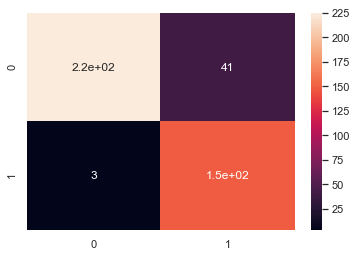

In [256]:
sns.heatmap(cf_matrix, annot=True)

In [257]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.99      0.85      0.91       266
           1       0.78      0.98      0.87       152

    accuracy                           0.89       418
   macro avg       0.89      0.91      0.89       418
weighted avg       0.91      0.89      0.90       418



In [258]:
grid_fpr, grid_tpr, grid_threshold = roc_curve(y_test, y_pred)
grid_roc_auc = auc(grid_fpr, grid_tpr)
grid_roc_auc

0.913063909774436

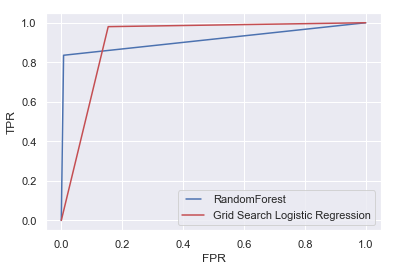

In [259]:
line1 = plt.plot(logistic_fpr, logistic_tpr, 'b', label='RandomForest')
line2 = plt.plot(grid_fpr, grid_tpr, 'r', label='Grid Search Logistic Regression')
plt.legend(handler_map= {line1[0]: HandlerLine2D(numpoints=2)})
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [260]:
filename = 'finalized_logistic_grid.pkl'
pickle.dump(logistic_grid, open(filename, 'wb'))
logistic_grid_loaded = pickle.load(open(filename, 'rb'))
result = logistic_grid_loaded.score(X_test, y_test)
print(result)

0.8947368421052632


In [261]:
naive =  GaussianNB()

In [262]:
naive.fit(X_train, y_train)

GaussianNB()

In [263]:
naive.score(X_test, y_test) 

0.7368421052631579

In [264]:
y_pred = naive.predict(X_test)
print(y_pred)

[0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.

In [265]:
errors = abs(y_pred - y_test)
errors

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [266]:
log_loss(y_test, y_pred) 

9.089277935097053

In [268]:
cf_matrix = confusion_matrix(y_test, y_pred)  
print(cf_matrix)

[[200  66]
 [ 44 108]]


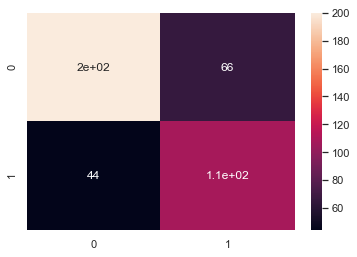

In [269]:
sns.heatmap(cf_matrix, annot=True)

In [270]:
report = classification_report(y_test, y_pred)
print('Report: \n',report)

Report: 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       266
           1       0.62      0.71      0.66       152

    accuracy                           0.74       418
   macro avg       0.72      0.73      0.72       418
weighted avg       0.75      0.74      0.74       418



In [271]:
naive_fpr, naive_tpr, naive_threshold = roc_curve(y_test, y_pred)
naive_roc_auc = auc(naive_fpr, naive_tpr)
naive_roc_auc

0.731203007518797

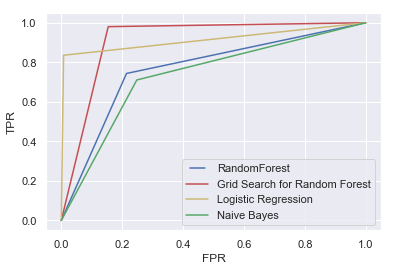

In [272]:
line1 = plt.plot(random_fpr, random_tpr, 'b', label='RandomForest')
line2 = plt.plot(grid_fpr, grid_tpr, 'r', label='Grid Search for Random Forest')
line3 = plt.plot(logistic_fpr, logistic_tpr, 'y', label='Logistic Regression')
line4 = plt.plot(naive_fpr, naive_tpr, 'g', label='Naive Bayes')
plt.legend(handler_map= {line1[0]: HandlerLine2D(numpoints=2)})
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [273]:
filename = 'finalized_naive.pkl'
pickle.dump(naive, open(filename, 'wb'))
naive_loaded = pickle.load(open(filename, 'rb'))
result = naive_loaded.score(X_test, y_test)
print(result)

0.7368421052631579
